<a href="https://colab.research.google.com/github/cristiansoto-f/reimagined-crypto-optimization/blob/main/CryptoPortfolioOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing and Optimizing your Crypto Portfolio

## Introduction

Tracking crypto portfolio performance over time is challenging. With multiple blockchain networks, managing several addresses, and limited tracking tools, it's not straightforward to get a complete picture of your investments.

Portfolio optimization, introduced to traditional finance by Harry Markowitz in 1952 through Modern Portfolio Theory, has been a standard tool for portfolio managers for decades. However, this approach remains relatively unknown in the crypto community.

This work aims to introduce portfolio optimization using modern tools and approaches. Using the 1inch API, we can easily gather portfolio data across time from multiple chains including:

- Ethereum
- Polygon
- Binance Smart Chain
- Arbitrum
- Gnosis
- Optimism
- Base

We'll explore different portfolio optimization methods, focusing on recent work like "Building Diversified Portfolio that Outperform Out-of-Sample" by Marcos Lopez de Prado (2016). This approach presents an alternative to classical portfolio optimization using hierarchical clustering, a machine learning model that allows for more diversified asset allocation. Unlike traditional Markowitz portfolios where only some assets are selected, Lopez de Prado's algorithm ensures all selected assets have a place in the portfolio.
Hierarchical Risk Parity Algorithm (HRP)

It's an alternative approach to portfolio optimization that uses modern mathematics (graph theory and machine learning techniques) to build a diversified portfolio based on the assets' covariance matrix, without needing to invert the matrix.
HRP improves upon classical portfolio construction methodology. In traditional Critical Line Algorithm (CLA), assets are 100% substitutable. In contrast, HRP creates a hierarchical structure using hierarchical clustering where assets are grouped based on similarities.
HRP addresses three main problems with Markowitz's CLA: result instability, extreme concentration in asset allocation when trying to reduce variance, and poor performance.

In [31]:
# Import required libraries
import requests
import pandas as pd
from google.colab import userdata

# Step 1: Get API Key
api_key = userdata.get('1inchApiKey')

# Step 2: Define chain IDs and user addresses
chain_ids = {
    "arbitrum": 42161,
    "base": 8453,
    "bsc": 56,
    "ethereum": 1,
    "gnosis": 100,
    "optimism": 10,
    "polygon": 137
}

user_addresses = ['0x65392485b8d869E59B5B2A3Cf7de815ed16939aA', '0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554']

# Step 3: Set up API URL and request options
api_url = "https://api.1inch.dev/portfolio/portfolio/v4/general/value_chart"
headers = {"Authorization": f"Bearer {api_key}"}
timerange = "3years"

# Step 4: Iterate through chains and addresses, collect data
combined_data = []

for chain_name, chain_id in chain_ids.items():
    for address in user_addresses:
        print(f"Fetching data for chain: {chain_name}, address: {address}")
        params = {
            "addresses": [address],
            "chain_id": chain_id,
            "timerange": timerange
        }

        response = requests.get(api_url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json().get("result", [])
            for entry in data:
                combined_data.append({
                    "chain": chain_name,
                    "address": address,
                    "timestamp": entry["timestamp"],
                    "value_usd": entry["value_usd"]
                })
        else:
            print(f"Failed to fetch data for chain: {chain_name}, address: {address}. Status: {response.status_code}")

# Step 5: Convert to pandas DataFrame
df = pd.DataFrame(combined_data)

# Step 6: Analyze composition of all portfolios over time
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Group by timestamp and sum values across all chains and addresses
portfolio_over_time = df.groupby('timestamp')['value_usd'].sum().reset_index()

print(portfolio_over_time)


Fetching data for chain: arbitrum, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: arbitrum, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: base, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: base, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: bsc, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: bsc, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: ethereum, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: ethereum, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: gnosis, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: gnosis, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: optimism, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: optimism, address: 0x8A43e8291f05Fc91d9E

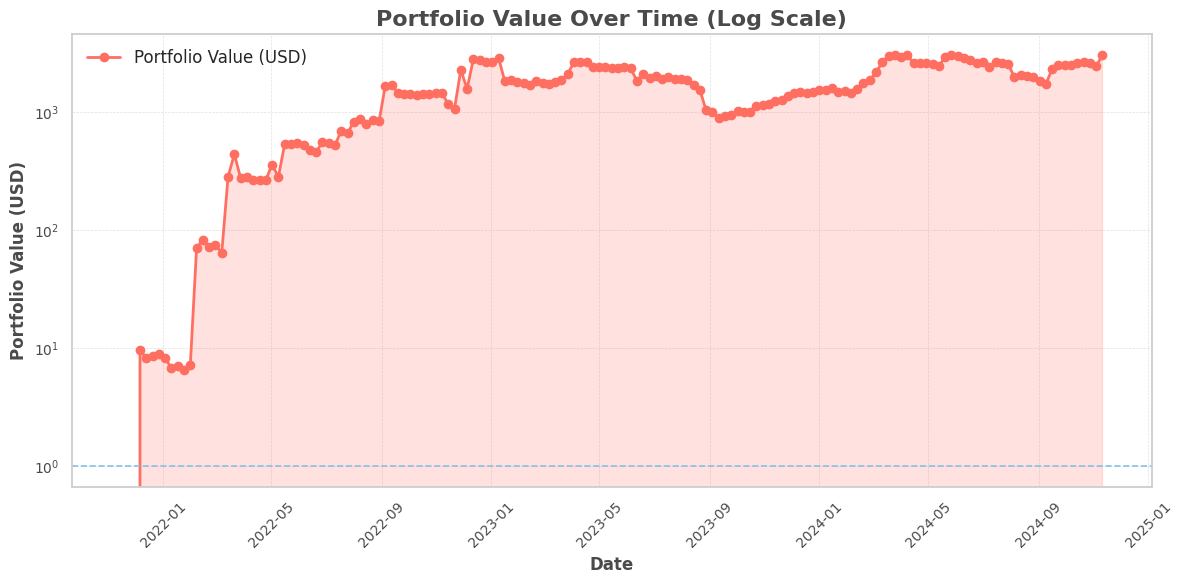

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7: Visualization
# Set seaborn style for improved aesthetics
sns.set_theme(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the data with a log scale
plt.plot(portfolio_over_time['timestamp'], portfolio_over_time['value_usd'],
         marker='o', linestyle='-', linewidth=2, markersize=6,
         color='#FF6F61', label="Portfolio Value (USD)")

# Set log scale for y-axis
plt.yscale('log')

# Customizing chart
plt.title('Portfolio Value Over Time (Log Scale)', fontsize=16, fontweight='bold', color='#4A4A4A')
plt.xlabel('Date', fontsize=12, fontweight='bold', color='#4A4A4A')
plt.ylabel('Portfolio Value (USD)', fontsize=12, fontweight='bold', color='#4A4A4A')
plt.xticks(fontsize=10, rotation=45, color='#4A4A4A')
plt.yticks(fontsize=10, color='#4A4A4A')

# Add grid with custom color
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=False)

# Highlight significant changes (optional, for style)
plt.axhline(y=1, color='#85C1E9', linestyle='--', linewidth=1.2, label='Threshold')
plt.fill_between(portfolio_over_time['timestamp'], portfolio_over_time['value_usd'],
                 color='#FF6F61', alpha=0.2)

# Show plot
plt.tight_layout()
plt.show()


In [9]:
# Step 8: Fetch token details and display

# Define the API endpoint for portfolio overview
portfolio_overview_url = "https://api.1inch.dev/portfolio/portfolio/v4/overview/erc20/details"
token_details_url = "https://api.1inch.dev/token/v1.2/{chain_id}/custom/{contract_address}"

# Placeholder for collected token data
token_data = []

# Iterate through each chain ID and user address
for chain_name, chain_id in chain_ids.items():
    for user_address in user_addresses:
        # Request options
        requestOptions = {
            "headers": {
                "Authorization": f"Bearer {userdata.get('1inchApiKey')}"  # Replace with your API key retrieval
            },
            "params": {
                "addresses": [user_address],
                "chain_id": chain_id,
                "timerange": "1day",
                "closed": True,
                "closed_threshold": 1
            }
        }

        # Fetch portfolio overview data
        response = requests.get(portfolio_overview_url, headers=requestOptions['headers'], params=requestOptions['params'])
        if response.status_code == 200:
            portfolio_overview = response.json()
        else:
            print(f"Failed to fetch portfolio overview for chain: {chain_name}, address: {user_address}. "
                  f"Status Code: {response.status_code}")
            continue

        # Process tokens from the portfolio overview
        for token in portfolio_overview.get('result', []):
            contract_address = token['contract_address']
            value_usd = token['value_usd']

            # Fetch token details
            token_response = requests.get(
                token_details_url.format(chain_id=chain_id, contract_address=contract_address),
                headers={"Authorization": f"Bearer {userdata.get('1inchApiKey')}"}
            )

            if token_response.status_code == 200:
                token_info = token_response.json()
                symbol = token_info.get('symbol', 'Unknown')
                token_name = token_info.get('name', 'Unknown')

                # Append token details to the list
                token_data.append({
                    "chain": chain_name,
                    "user_address": user_address,
                    "symbol": symbol,
                    "token_name": token_name,
                    "contract_address": contract_address,
                    "value_usd": value_usd
                })
            else:
                print(f"Failed to fetch details for contract {contract_address} on chain {chain_name}")

# Display the collected token data
for token in token_data:
    print(f"Chain: {token['chain']}, User: {token['user_address']}, "
          f"Symbol: {token['symbol']}, Token Name: {token['token_name']}, "
          f"Contract Address: {token['contract_address']}, Value (USD): {token['value_usd']:.2f}")


Chain: arbitrum, User: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554, Symbol: ETH, Token Name: Ether, Contract Address: 0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee, Value (USD): 15.66
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: ETH, Token Name: Ether, Contract Address: 0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee, Value (USD): 784.97
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: USDC, Token Name: USD Coin, Contract Address: 0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48, Value (USD): 693.40
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: DAI, Token Name: Dai Stablecoin, Contract Address: 0x6b175474e89094c44da98b954eedeac495271d0f, Value (USD): 73.74
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: SUSHI, Token Name: SushiToken, Contract Address: 0x6b3595068778dd592e39a122f4f5a5cf09c90fe2, Value (USD): 10.09
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: USD

In [11]:
from prettytable import PrettyTable

# Consolidate portfolio data
consolidated_data = [
    {
        "symbol": token["symbol"],
        "token_name": token["token_name"],
        "contract_address": token["contract_address"],
        "chain": token["chain"],
        "usd_value": token["value_usd"]
    }
    for token in token_data
]

# Sort data by usd_value in descending order
consolidated_data = sorted(consolidated_data, key=lambda x: x["usd_value"], reverse=True)

# Create a table using PrettyTable
table = PrettyTable()
table.field_names = ["Symbol", "Token Name", "Contract Address", "Chain", "USD Value"]

# Populate the table
for token in consolidated_data:
    table.add_row([token["symbol"], token["token_name"], token["contract_address"], token["chain"], f"${token['usd_value']:.2f}"])

# Print the sorted table
print(table)


+--------+---------------------------------+--------------------------------------------+----------+-----------+
| Symbol |            Token Name           |              Contract Address              |  Chain   | USD Value |
+--------+---------------------------------+--------------------------------------------+----------+-----------+
|  ETH   |              Ether              | 0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee | ethereum |  $784.97  |
|  USDC  |             USD Coin            | 0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 | ethereum |  $693.40  |
|  WBTC  |         Wrapped Bitcoin         | 0x68f180fcce6836688e9084f035309e29bf0a2095 | optimism |  $437.11  |
|  ETH   |              Ether              | 0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee | ethereum |  $275.69  |
| WstETH | Wrapped liquid staked Ether 2.0 | 0x1f32b1c2345538c0c6f582fcb022739c4a194ebb | optimism |  $174.15  |
|  DAI   |          Dai Stablecoin         | 0x6b175474e89094c44da98b954eedeac495271d0f | ethere

In [32]:
# Install requiered components

!pip install -q riskfolio-lib
import riskfolio as rp
import yfinance as yf

In [49]:
# Get Symbols
symbols = [token["symbol"] for token in consolidated_data]

# Append '-USD' to each symbol to match Yahoo Finance format
assets = [f"{symbol}-USD" for symbol in symbols]
assets.sort()

# Remove duplicates (if any)
assets = list(set(assets))

# Date range for the price data
start = '2020-01-01'
end = '2024-11-17'

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

data

[*********************100%***********************]  8 of 8 completed


,USDC-USD,WstETH-USD,USDT-USD,WBTC-USD,POL-USD,DAI-USD,ETH-USD,SUSHI-USD
Date,,,,,,,,
2020-01-01 00:00:00+00:00,1.000243,130.802002,NaN,NaN,1.004079,0.999836,7224.741211,NaN
2020-01-02 00:00:00+00:00,0.997823,127.410179,NaN,NaN,1.005017,1.001565,7006.900391,NaN
2020-01-03 00:00:00+00:00,1.002185,134.171707,NaN,NaN,1.005273,1.004192,7341.853027,NaN
2020-01-04 00:00:00+00:00,1.007795,135.069366,NaN,NaN,1.009466,1.007472,7408.195312,NaN
2020-01-05 00:00:00+00:00,1.007635,136.276779,NaN,NaN,1.008497,1.006197,7401.396484,NaN
...,...,...,...,...,...,...,...,...
2024-11-12 00:00:00+00:00,0.999735,3246.257324,NaN,0.792239,1.000061,1.000982,87882.554688,3861.757080
2024-11-13 00:00:00+00:00,0.999871,3192.595947,NaN,0.760392,1.000043,1.001271,90137.406250,3766.296387
2024-11-14 00:00:00+00:00,0.999774,3058.948730,NaN,0.713689,0.999929,1.000019,87007.625000,3635.195068


In [54]:
# Get Symbols
symbols = [token["symbol"] for token in consolidated_data]

# Define mapping for correct Yahoo Finance tickers
ticker_mapping = {
    "WBTC": "BTC",
    "WstETH": "STETH",
    "POL": "MATIC",
}

# Create assets list with proper mapping
assets = []
for symbol in symbols:
    # Apply mapping if exists, otherwise use original symbol
    mapped_symbol = ticker_mapping.get(symbol, symbol)
    assets.append(f"{mapped_symbol}-USD")

# Sort and remove duplicates
assets = list(set(assets))
assets.sort()

# Date range
start = '2020-01-01'
end = '2024-11-17'

# Downloading data
data = yf.download(assets, start=start, end=end)
# Fix the multi-index column issue
data = data.loc[:, ('Adj Close', slice(None))]
# Flatten the multi-index columns to single level
data.columns = [col[1] for col in data.columns]

# Print to verify
print("Downloaded assets:", assets)
print("\nData shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

[*********************100%***********************]  8 of 8 completed

Downloaded assets: ['BTC-USD', 'DAI-USD', 'ETH-USD', 'MATIC-USD', 'STETH-USD', 'SUSHI-USD', 'USDC-USD', 'USDT-USD']

Data shape: (1782, 8)

First few rows:
                               BTC-USD   DAI-USD     ETH-USD  MATIC-USD  \
Date                                                                      
2020-01-01 00:00:00+00:00  7200.174316  1.000243  130.802002   0.014962   
2020-01-02 00:00:00+00:00  6985.470215  0.997823  127.410179   0.014651   
2020-01-03 00:00:00+00:00  7344.884277  1.002185  134.171707   0.015194   
2020-01-04 00:00:00+00:00  7410.656738  1.007795  135.069366   0.014961   
2020-01-05 00:00:00+00:00  7411.317383  1.007635  136.276779   0.014914   

                           STETH-USD  SUSHI-USD  USDC-USD  USDT-USD  
Date                                                                 
2020-01-01 00:00:00+00:00        NaN        NaN  1.004079  0.999836  
2020-01-02 00:00:00+00:00        NaN        NaN  1.005017  1.001565  
2020-01-03 00:00:00+00:00        NaN  

In [55]:
# Calculating returns
Y = data[assets].pct_change().dropna()
display(Y.head())

,BTC-USD,DAI-USD,ETH-USD,MATIC-USD,STETH-USD,SUSHI-USD,USDC-USD,USDT-USD
Date,,,,,,,,
2020-12-24 00:00:00+00:00,0.021281,0.000192,0.047785,0.082807,0.039297,0.183668,0.000135,0.000505
2020-12-25 00:00:00+00:00,0.039132,0.000302,0.024204,0.009597,0.023454,-0.020370,0.000116,0.000237
2020-12-26 00:00:00+00:00,0.071853,-0.001183,0.015046,0.160821,0.002134,-0.060144,-0.000457,-0.001687
2020-12-27 00:00:00+00:00,-0.006231,0.000982,0.073614,-0.051467,0.087645,0.104088,0.000346,0.000374
2020-12-28 00:00:00+00:00,0.030927,0.000570,0.069956,0.031255,0.065361,-0.002341,0.000022,-0.000251


In [63]:
Y

,BTC-USD,DAI-USD,ETH-USD,MATIC-USD,STETH-USD,SUSHI-USD,USDC-USD,USDT-USD
Date,,,,,,,,
2020-12-24 00:00:00+00:00,0.021281,0.000192,0.047785,0.082807,0.039297,0.183668,0.000135,0.000505
2020-12-25 00:00:00+00:00,0.039132,0.000302,0.024204,0.009597,0.023454,-0.020370,0.000116,0.000237
2020-12-26 00:00:00+00:00,0.071853,-0.001183,0.015046,0.160821,0.002134,-0.060144,-0.000457,-0.001687
2020-12-27 00:00:00+00:00,-0.006231,0.000982,0.073614,-0.051467,0.087645,0.104088,0.000346,0.000374
2020-12-28 00:00:00+00:00,0.030927,0.000570,0.069956,0.031255,0.065361,-0.002341,0.000022,-0.000251
...,...,...,...,...,...,...,...,...
2024-11-12 00:00:00+00:00,-0.008407,-0.000045,-0.038093,-0.057098,-0.036954,-0.079084,0.000283,-0.000134
2024-11-13 00:00:00+00:00,0.029883,0.000136,-0.016530,-0.063157,-0.019259,-0.040199,-0.000018,0.000289
2024-11-14 00:00:00+00:00,-0.036803,-0.000097,-0.041862,-0.046437,-0.042469,-0.061420,-0.000114,-0.001250


The Hierarchical Risk Parity Algorithm (HTP) has 3 steps
- Tree clustering
- Cuasidiagonalizacion
- Biseccion recursiva

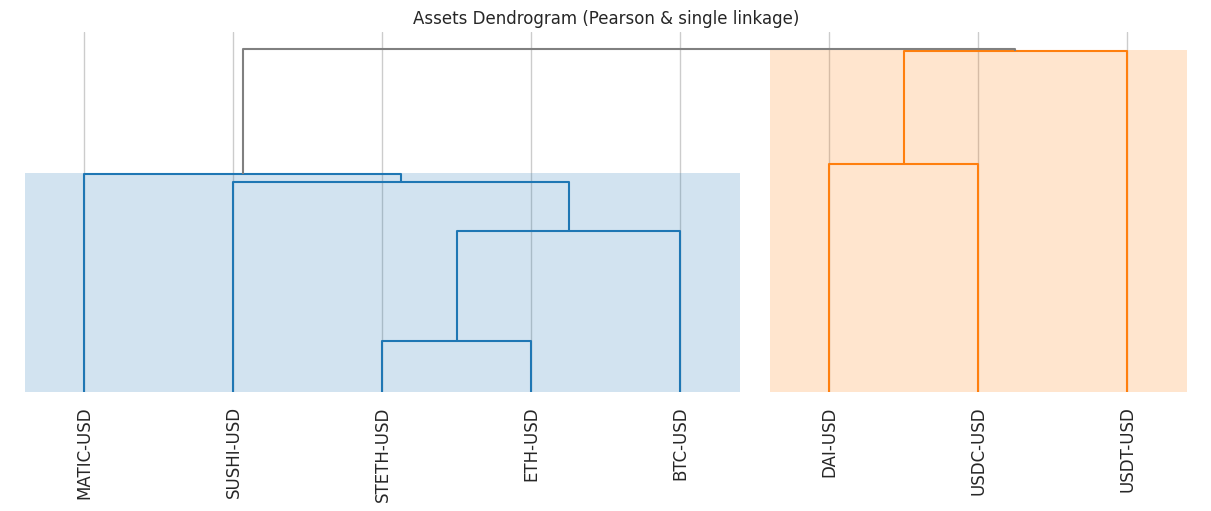

In [56]:
ax = rp.plot_dendrogram(returns=Y,
                      codependence='pearson',
                      linkage='single',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      #dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

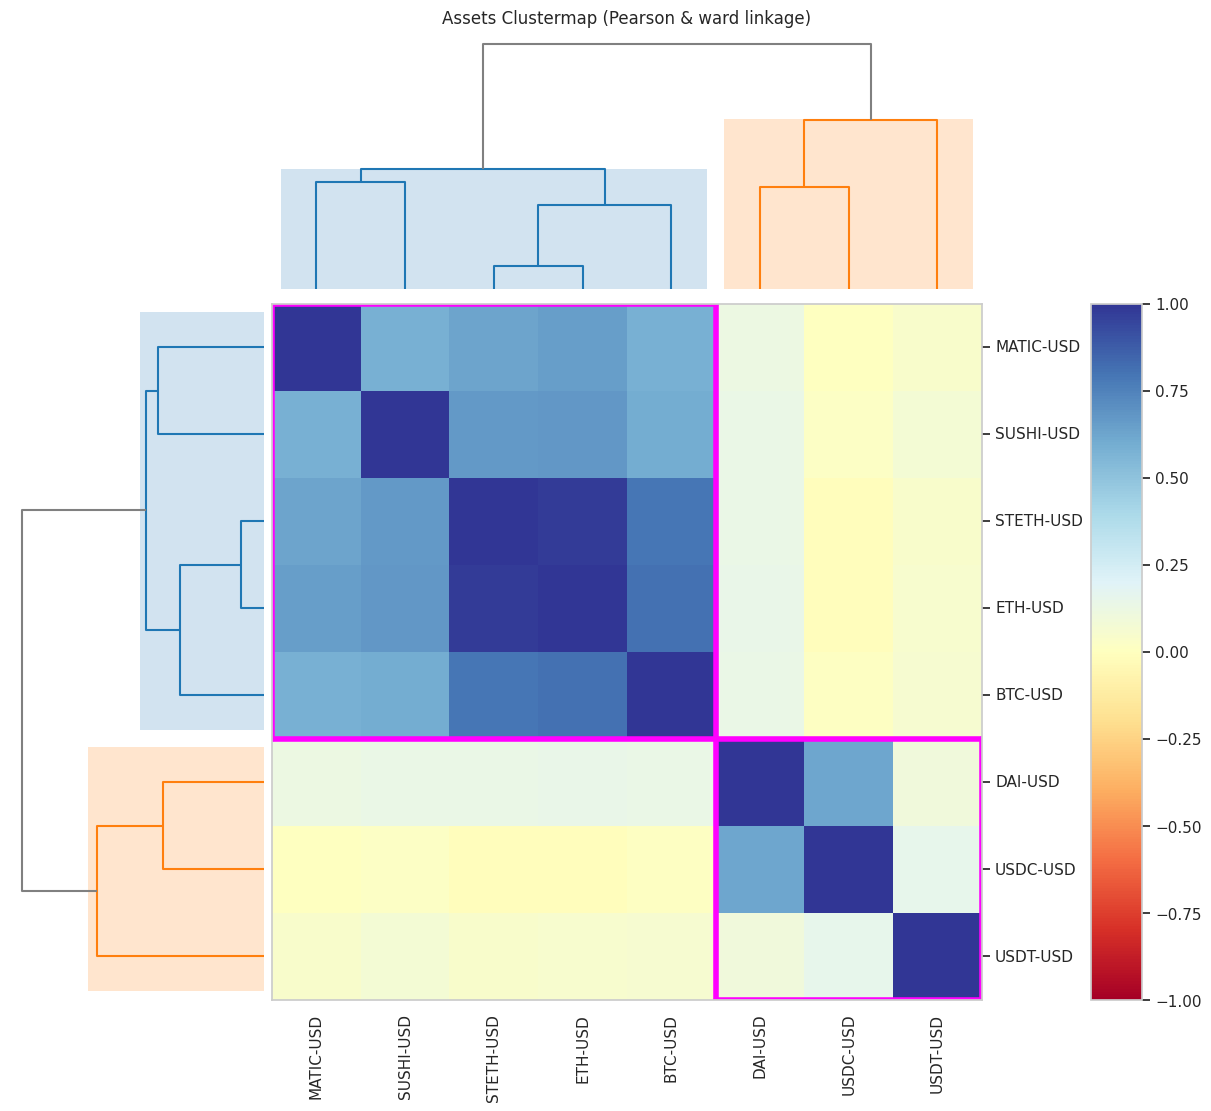

In [57]:
# Plotting Assets Clusters
ax = rp.plot_clusters(returns=Y,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

# Hierarchical Clustering
Clustering refers to a set of techniques for finding subgroups or clusters within a dataset. When grouping observations, the goal is to divide them into different groups so that similar and different ones form their respective groups. It is an algorithm that generates clusters using previously established groupings. The result of this method is a visual representation of the observations, similar to a tree, called a dendrogram, which allows immediate visualization of the grouping obtained for each possible number of groups from 1 to n.

## Quasi-diagonalization
In the second stage, the rows and columns of the covariance matrix are reorganized so that the largest values are found along the diagonal. This quasi-diagonalization of the covariance matrix helps keep similar investments together and different ones far apart. The algorithm works as follows: each row of the linkage matrix combines two branches into one. We replace the clusters with their components recursively until no clusters remain. These replacements preserve the grouping order. The result is an ordered list of original elements.

## Recursive Bisection
The final step to perform in the HRP algorithm is the assignment of weights to each asset. Having a quasi-diagonalized covariance matrix becomes advantageous when performing inverse variance allocation. This can be leveraged in two ways:
- Bottom-up: Calculate the variance of a continuous subset as the variance of an inverse variance allocation
- Top-down: Divide allocations between adjacent subsets in proportion to the inverse of their aggregate variances. These two methodologies can be used simultaneously in the algorithm.

# Hierarchical Equal Risk Contribution Portfolio (HERC)
Building on the fundamental notion of hierarchy, Hierarchical Risk Parity (HRP) and Hierarchical Clustering based Asset Allocation (HCAA), the Hierarchical Equal Risk Contribution Portfolio (HERC) aims to diversify both capital allocation and risk allocation. HERC merges and improves HCAA's machine learning approach and HRP's top-down recursive bisection. More specifically, the modified Top-Down recursive division is based on the dendrogram shape, follows an Equal Risk Contribution allocation, and extends to downside risk measures such as Conditional Value at Risk (CVaR) and Conditional Drawdown at Risk (CDaR).

In summary, the principle is to maintain correlations that truly matter, and once assets are hierarchically grouped, a capital allocation is estimated. However, the design and implementation of portfolio optimization differ substantially between the two approaches. HRP begins by reorganizing the covariance matrix to place similar investments together. It then employs an inverse variance weight allocation based on the number of assets without using more grouping. HCAA allocates capital within and across asset groups at multiple hierarchical levels. The "hierarchical 1/N" proposed in Raffinot [2017a] finds a diversified weighting by distributing capital equally across each hierarchy of clusters. Then, within a cluster, an equal-weight allocation is calculated.

In [58]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:
model = 'HERC' # could be HRP also
codependece = 'pearson' # correlation matrix used to group assets in clusters.
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0.05 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,BTC-USD,DAI-USD,ETH-USD,MATIC-USD,STETH-USD,SUSHI-USD,USDC-USD,USDT-USD
weights,0.00009,0.112119,0.000055,0.000021,0.000055,0.000022,0.218212,0.669427


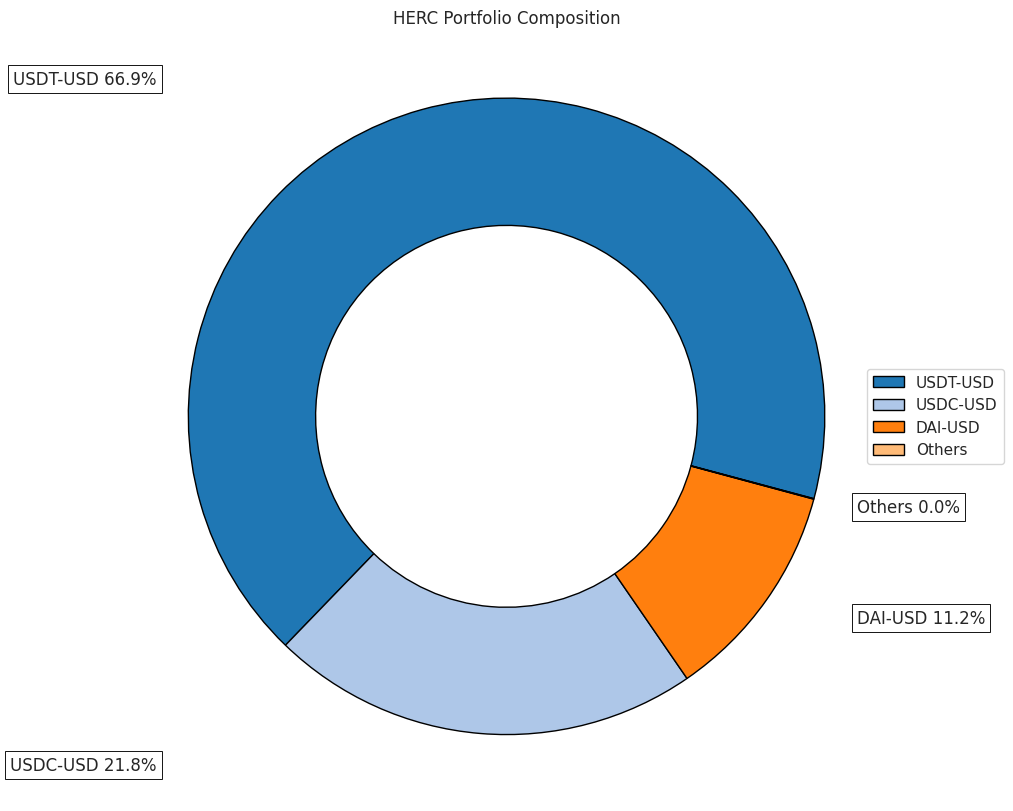

In [59]:
# Graph portfolio composition
ax = rp.plot_pie(
    w=w,
    title = 'HERC Portfolio Composition',
    nrow = 25,
    cmap = 'tab20',
    height = 8,
    width = 10,
    ax = None
)

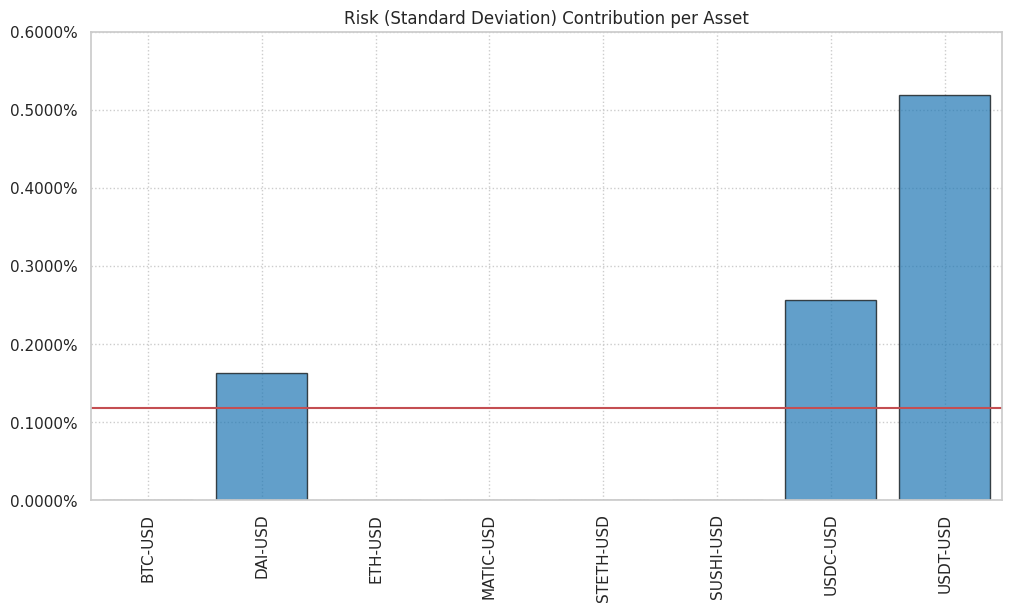

In [60]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

In [61]:
# Risk Measures available:

rms = ['vol', 'MV', 'MAD', 'GMD', 'MSV', 'FLPM', 'SLPM', 'VaR',
       'CVaR', 'TG', 'EVaR', 'WR', 'RG', 'CVRG', 'TGRG', 'MDD',
       'ADD', 'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel',
       'ADD_Rel', 'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          codependence=codependence,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)

w_s.columns = rms

In [62]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MAD,GMD,MSV,FLPM,SLPM,VaR,CVaR,TG,EVaR,WR,RG,CVRG,TGRG,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
BTC-USD,0.47%,0.01%,0.26%,0.28%,0.47%,10.44%,10.03%,0.19%,0.35%,0.43%,1.16%,1.36%,1.24%,0.36%,0.45%,0.33%,0.54%,0.25%,0.23%,0.31%,0.43%,0.50%,0.55%,0.32%,0.32%,0.45%,0.47%
DAI-USD,20.32%,11.21%,19.07%,18.97%,20.76%,16.79%,18.45%,20.24%,18.06%,17.61%,23.16%,23.24%,23.62%,18.30%,17.66%,23.37%,34.91%,34.94%,33.53%,27.39%,35.22%,22.91%,33.60%,33.70%,32.41%,26.73%,33.81%
ETH-USD,0.37%,0.01%,0.20%,0.22%,0.36%,10.27%,9.37%,0.16%,0.28%,0.34%,0.78%,0.80%,0.81%,0.29%,0.35%,0.30%,0.56%,0.27%,0.24%,0.31%,0.46%,0.48%,0.47%,0.31%,0.32%,0.44%,0.43%
MATIC-USD,0.22%,0.00%,0.13%,0.14%,0.26%,9.53%,8.22%,0.12%,0.22%,0.27%,0.64%,0.67%,0.48%,0.18%,0.21%,0.23%,0.44%,0.23%,0.20%,0.25%,0.38%,0.43%,0.36%,0.27%,0.28%,0.38%,0.34%
STETH-USD,0.37%,0.01%,0.20%,0.22%,0.36%,10.27%,9.37%,0.16%,0.28%,0.33%,0.80%,0.83%,0.85%,0.29%,0.35%,0.29%,0.56%,0.28%,0.24%,0.30%,0.46%,0.48%,0.47%,0.31%,0.32%,0.43%,0.43%
SUSHI-USD,0.23%,0.00%,0.12%,0.13%,0.24%,9.11%,7.63%,0.10%,0.19%,0.23%,0.55%,0.57%,0.49%,0.19%,0.23%,0.19%,0.21%,0.14%,0.13%,0.18%,0.19%,0.39%,0.26%,0.24%,0.25%,0.34%,0.25%
USDC-USD,28.35%,21.82%,42.11%,41.50%,27.10%,16.80%,18.46%,44.35%,38.00%,35.44%,21.04%,20.85%,21.31%,38.37%,35.83%,21.46%,33.27%,34.16%,34.29%,25.34%,33.15%,21.42%,33.60%,34.61%,34.60%,25.33%,33.43%
USDT-USD,49.66%,66.94%,37.90%,38.54%,50.44%,16.80%,18.46%,34.68%,42.63%,45.35%,51.87%,51.68%,51.20%,42.03%,44.93%,53.82%,29.52%,29.74%,31.13%,45.92%,29.72%,53.39%,30.68%,30.24%,31.51%,45.90%,30.82%


# Risk Measures Explained

Here's a brief explanation of common portfolio risk measures:

## Traditional Risk Measures
- **Vol (Volatility)**: Standard deviation of returns, measures overall variability
- **MV (Mean Variance)**: Balances expected return against variance
- **MAD (Mean Absolute Deviation)**: Average absolute deviation from mean
- **GMD (Gini Mean Difference)**: Measures statistical dispersion
- **MSV (Mean Semi-Variance)**: Variance of negative returns only

## Lower Partial Moments
- **FLPM (First Lower Partial Moment)**: Expected shortfall below target
- **SLPM (Second Lower Partial Moment)**: Variance of shortfall below target
> **Note**: Bitcoin shows higher allocation in optimal portfolios when using FLPM and SLPM risk measures

## Value at Risk Measures
- **VaR (Value at Risk)**: Maximum loss at confidence level
- **CVaR (Conditional VaR)**: Expected loss beyond VaR
- **TG (Tail Gini)**: Gini coefficient in the tail
- **EVaR (Entropic VaR)**: VaR with entropy penalty

## Drawdown Measures
- **WR (Worst Realization)**: Worst observed return
- **RG (Range)**: Difference between best and worst returns
- **CVRG (CVaR Range)**: Range of conditional losses
- **TGRG (Tail Gini Range)**: Range of tail losses

## Maximum Drawdown Related
- **MDD (Maximum Drawdown)**: Largest peak-to-trough decline
- **ADD (Average Drawdown)**: Mean of all drawdowns
- **DaR (Drawdown at Risk)**: VaR of drawdowns
- **CDaR (Conditional Drawdown at Risk)**: CVaR of drawdowns
- **EDaR (Entropic Drawdown at Risk)**: Entropic measure of drawdowns

## Uncertainty Measures
- **UCI (Ulcer Index)**: Root mean square of drawdowns

## Relative Measures
All above measures with "_Rel" suffix are calculated relative to a benchmark:
- **MDD_Rel**: Relative Maximum Drawdown
- **ADD_Rel**: Relative Average Drawdown
- **DaR_Rel**: Relative Drawdown at Risk
- **CDaR_Rel**: Relative Conditional Drawdown at Risk
- **EDaR_Rel**: Relative Entropic Drawdown at Risk
- **UCI_Rel**: Relative Ulcer Index

# Conclusions

## Key Findings

### Conservative Allocations
- The optimization algorithms predominantly favor stablecoins in portfolio construction
- This conservative bias is noteworthy given these are modern portfolio optimization techniques
- The preference for stablecoins suggests the algorithms may be overly risk-averse when applied to crypto markets

### Lower Partial Moments (LPM) Analysis
- More volatile assets like Bitcoin show higher allocations when using LPM risk measures (FLPM & SLPM)
- This is theoretically sound because:
 - LPM only penalizes downside risk, not upside volatility
 - Traditional measures like volatility penalize both upward and downward price movements
 - In crypto markets with significant upside potential, LPM may provide more balanced risk assessment

### Limitations & Future Research

#### Backtesting Requirements
- Historical performance validation is crucial, especially considering:
 - Significant crypto bull markets in recent years
 - Bitcoin's historical risk-adjusted returns
 - Varying market regimes and correlation patterns
- Need to assess portfolio performance across different market cycles

#### Market Dynamics Considerations
- Crypto market's unique characteristics may require adjustments to traditional optimization methods:
 - High volatility regimes
 - Non-normal return distributions
 - Extreme tail events
 - Market maturity evolution

### Practical Applications

#### Proposed Web Application
- Concept: User-friendly interface for wallet address-based portfolio optimization
- Features to consider:
 - Multiple risk measure options
 - Dynamic rebalancing suggestions
 - Historical performance visualization
 - Risk tolerance customization

#### Implementation Recommendations
1. Incorporate multiple risk measures for balanced perspective
2. Include regime-switching capabilities
3. Add risk tolerance parameters
4. Consider transaction costs and liquidity constraints
5. Implement regular rebalancing frameworks

## Future Directions
1. Develop hybrid optimization models specific to crypto markets
2. Incorporate on-chain metrics into risk assessment
3. Study the impact of market maturity on optimal allocations
4. Research correlation stability across market cycles
5. Evaluate the role of stablecoins in portfolio optimization during different market phases

This research provides valuable insights into the application of modern portfolio theory to cryptocurrency markets, while highlighting the need for continued refinement of these methods for this unique asset class.